# Mounting drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing SentenceTransformer and LIME

In [2]:
!pip install -U sentence-transformers
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.8 MB/s 
     |████████████████████████████████| 4.4 MB 36.1 MB/s 
     |████████████████████████████████| 1.2 MB 58.1 MB/s 
     |████████████████████████████████| 101 kB 11.8 MB/s 
     |████████████████████████████████| 596 kB 21.4 MB/s 
     |████████████████████████████████| 6.6 MB 51.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=9482de9470c11b5deee04bb22d827d162ff1f94a79bac7ee8ae4dd556b2d81bb
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Reading datasets from drive

In [4]:
dataSet1 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/article_and_tweets_with_cleaning.csv', sep = ",")
dataSet2 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/article_and_tweets_without_cleaning.csv', sep = ",")
dataSet3 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/tweets_with_cleaning.csv', sep = ",")
dataSet4 = pd.read_csv('/content/drive/MyDrive/Medical Misinformation Detection Model/Datasets/Created Dataset/tweets_without_cleaning.csv', sep = ",")
dataSet_array = [dataSet1, dataSet2, dataSet3, dataSet4]

# Creating the SentenceTransformer model for encode the texts

In [5]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

# Define plot method

In [6]:
def plot_graphs(score_list, k_range, maxScore, max_k):
  fig, (ax) = plt.subplots(1)
  plt.xlabel("k")
  plt.ylabel("score")
  plt.title('find the best k')
  arrayX =[0, max_k]
  arrayY =[0.0, maxScore]
  arrayX_cons = [maxScore, maxScore]
  arrayY_cons = [max_k, max_k]
  
  line, = ax.plot(k_range, score_list)

  ax.annotate('best k', xy=(max_k, maxScore), xytext=(max_k+2, maxScore+1),
              arrowprops=dict(facecolor='black', shrink=0.1),
             )
  ax.plot(arrayY_cons, arrayY)
  ax.plot(arrayX, arrayX_cons)
  ax.get_lines()[1].set_color("black")
  ax.get_lines()[2].set_color("black")
  ax.set_ylim(min(score_list)-2,max(score_list)+2)
  plt.show()

# Define find the best k method

In [7]:
def find_the_best_k(training_padded, training_labels, testing_padded, testing_labels):
  maxScore = 0
  result = 0
  k_range = list(range(1, 51))
  score_list = []
  for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_padded, training_labels)
    score = knn.score(testing_padded, testing_labels)
    score = score * 100
    score_list.append(score)
    if maxScore < score:
      maxScore = score
      result = k
  plot_graphs(score_list, k_range, maxScore, result)
  return result

# Experiment

------------------------------------------------------------
!!!!!  sub-experiment with KNN model number 1  !!!!!
!!!!!  dataset used is : article and tweets with cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({True: 9882, False: 9865})
     In testing: Counter({False: 1106, True: 1089})


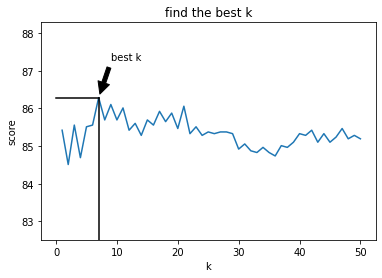

           The best k found: 7,  score = 0.8628701594533029


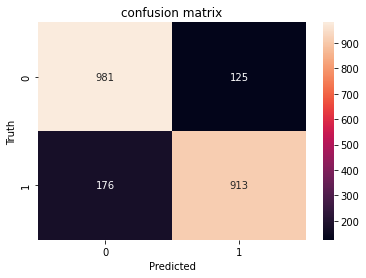

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1106
        True       0.88      0.84      0.86      1089

    accuracy                           0.86      2195
   macro avg       0.86      0.86      0.86      2195
weighted avg       0.86      0.86      0.86      2195

             !!!!!  split number : 2  !!!!!
     In training: Counter({False: 9883, True: 9864})
     In testing: Counter({True: 1107, False: 1088})


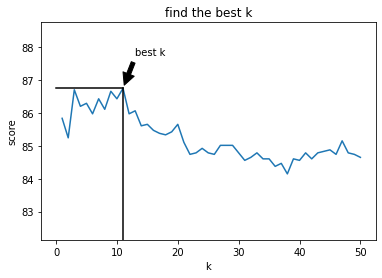

           The best k found: 11,  score = 0.8674259681093394


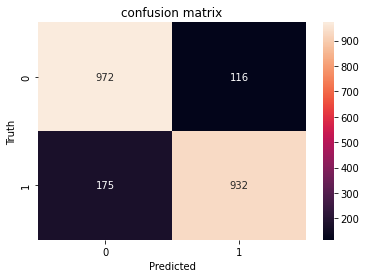

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1088
        True       0.89      0.84      0.86      1107

    accuracy                           0.87      2195
   macro avg       0.87      0.87      0.87      2195
weighted avg       0.87      0.87      0.87      2195

             !!!!!  split number : 3  !!!!!
     In training: Counter({True: 9889, False: 9859})
     In testing: Counter({False: 1112, True: 1082})


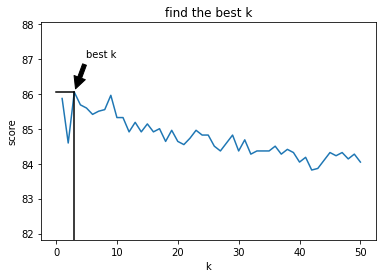

           The best k found: 3,  score = 0.8605287146763901


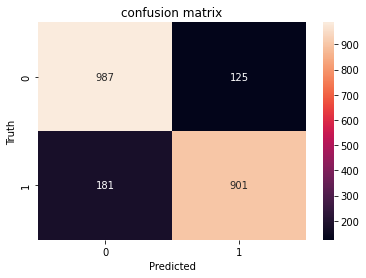

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1112
        True       0.88      0.83      0.85      1082

    accuracy                           0.86      2194
   macro avg       0.86      0.86      0.86      2194
weighted avg       0.86      0.86      0.86      2194

             !!!!!  split number : 4  !!!!!
     In training: Counter({False: 9879, True: 9869})
     In testing: Counter({True: 1102, False: 1092})


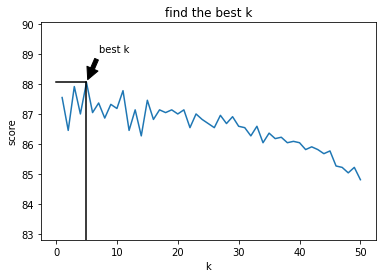

           The best k found: 5,  score = 0.8805834092980857


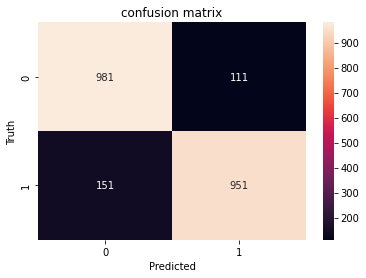

              precision    recall  f1-score   support

       False       0.87      0.90      0.88      1092
        True       0.90      0.86      0.88      1102

    accuracy                           0.88      2194
   macro avg       0.88      0.88      0.88      2194
weighted avg       0.88      0.88      0.88      2194

             !!!!!  split number : 5  !!!!!
     In training: Counter({True: 9926, False: 9822})
     In testing: Counter({False: 1149, True: 1045})


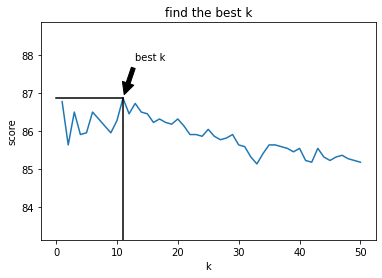

           The best k found: 11,  score = 0.8687329079307201


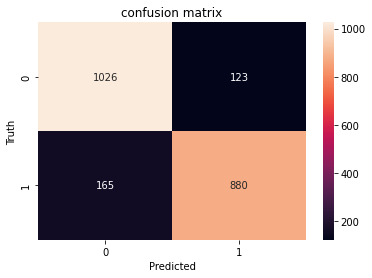

              precision    recall  f1-score   support

       False       0.86      0.89      0.88      1149
        True       0.88      0.84      0.86      1045

    accuracy                           0.87      2194
   macro avg       0.87      0.87      0.87      2194
weighted avg       0.87      0.87      0.87      2194

             !!!!!  split number : 6  !!!!!
     In training: Counter({True: 9884, False: 9864})
     In testing: Counter({False: 1107, True: 1087})


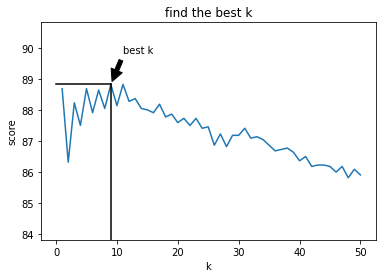

           The best k found: 9,  score = 0.8883318140382862


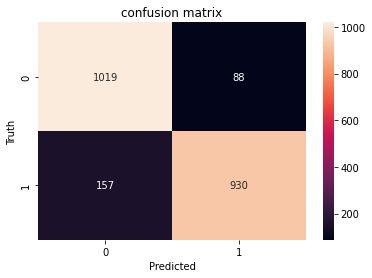

              precision    recall  f1-score   support

       False       0.87      0.92      0.89      1107
        True       0.91      0.86      0.88      1087

    accuracy                           0.89      2194
   macro avg       0.89      0.89      0.89      2194
weighted avg       0.89      0.89      0.89      2194

             !!!!!  split number : 7  !!!!!
     In training: Counter({False: 9929, True: 9819})
     In testing: Counter({True: 1152, False: 1042})


KeyboardInterrupt: ignored

In [8]:
sub_experiment_count = 1
accuracy  = 0
recall    = 0
f1_score  = 0
precision = 0
for dataSet in dataSet_array:
  dataSet_text = dataSet['text']
  dataSet_label = dataSet['label']
  sub_accuracy  = 0
  sub_recall    = 0
  sub_f1_score  = 0
  sub_precision = 0
  print('------------------------------------------------------------')
  #some output
  if sub_experiment_count == 1:
    print('!!!!!  sub-experiment with KNN model number 1  !!!!!')
    print('!!!!!  dataset used is : article and tweets with cleaning  !!!!!')
  elif sub_experiment_count == 2:
    print('!!!!!  sub-experiment with KNN model number 2  !!!!!')
    print('!!!!!  dataset used is : article and tweets without cleaning  !!!!!')
  elif sub_experiment_count == 3:
    print('!!!!!  sub-experiment with KNN model number 3  !!!!!')
    print('!!!!!  dataset used is : tweets with cleaning  !!!!!')
  elif sub_experiment_count == 4:
    print('!!!!!  sub-experiment with KNN model number 4  !!!!!')
    print('!!!!!  dataset used is : tweets without cleaning  !!!!!')
  print('------------------------------------------------------------')

  #cross validation counter
  split = 1
  kfold = KFold(n_splits=10, shuffle=True)
  
  #encode the texts
  sentences_encode = model.encode(dataSet_text)
  
  #cross validation loop
  for train, test in kfold.split(sentences_encode, dataSet_label):
  
    #convert the vectors to np array
    training_padded = np.array(sentences_encode[train])
    training_labels = np.array(dataSet_label[train])
    testing_padded  = np.array(sentences_encode[test])
    testing_labels  = np.array(dataSet_label[test])

    #some output
    print('             !!!!!  split number : '+ str(split) + '  !!!!!')
    print('     ' + f'In training: {Counter(training_labels)}')
    print('     ' + f'In testing: {Counter(testing_labels)}')

    #find best k
    k = find_the_best_k(training_padded, training_labels, testing_padded, testing_labels)
    #creat KNN model 
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model
    knn.fit(training_padded, training_labels)
    #get the model score
    score = knn.score(testing_padded, testing_labels)
    #get the predicted lable
    lable_predicted = knn.predict(testing_padded)

    #some output
    print('           The best k found: '+str(k)+',  score = '+str(score))
    
    #create and show the confusion matrix
    cm = metrics.confusion_matrix(testing_labels, lable_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('confusion matrix')
    plt.show()
    
    #show the classification report 
    print(metrics.classification_report(testing_labels, lable_predicted))

    #add the new metrics result from the new cross val. to the old  metrics result from the old cross val.
    sub_accuracy  = sub_accuracy + metrics.accuracy_score(testing_labels, lable_predicted)
    sub_recall    = sub_recall + metrics.recall_score(testing_labels, lable_predicted)
    sub_f1_score  = sub_f1_score + metrics.f1_score(testing_labels, lable_predicted)
    sub_precision = sub_precision + metrics.precision_score(testing_labels, lable_predicted)
    
    #indexing
    split = split + 1
  #compute the mean of the using metrics in the cross val.
  sub_accuracy  = sub_accuracy / 10
  sub_recall    = sub_recall / 10
  sub_f1_score  = sub_f1_score / 10
  sub_precision = sub_precision / 10

  #some output
  print("mean accuracy for this sub_experiment is " + str(round(sub_accuracy, 2)))
  print("mean recall for this sub_experiment is " + str(round(sub_recall, 2)))
  print("mean precision for this sub_experiment is " + str(round(sub_precision, 2)))
  print("mean f1_score for this sub_experiment is " + str(round(sub_f1_score, 2)))

  #add the new metrics result from the new sub experiment to the old  metrics result from the old sub experiments
  accuracy  = accuracy + sub_accuracy
  recall    = recall + sub_recall
  precision = precision + sub_precision
  f1_score  = f1_score + sub_f1_score

  #indexing
  sub_experiment_count = sub_experiment_count + 1

#compute the mean of the using metrics for the 4 sub experiments.
accuracy  = accuracy / 4
recall    = recall / 4
f1_score  = f1_score / 4
precision = precision / 4


#some output
print('---------------------------------------------------------')
print('                   End of Experiment')
print('---------------------------------------------------------')

print("mean accuracy for this experiment is " + str(round(accuracy, 2)))
print("mean recall for this experiment is " + str(round(recall, 2)))
print("mean precision for this experiment is " + str(round(precision, 2)))
print("mean f1_score for this experiment is " + str(round(f1_score, 2)))